## **1. Finding Outlier Data**
### **Coding Exercise**
Load the `Iris` dataset and identify outliers in the petal length feature using the **Z-score** and **IQR (Interquartile Range) methods**. Visualize the outliers using a box plot.  Inline code
**Dataset**: `sklearn.datasets.load_iris()`  
**Steps**:  
- Compute the **Z-score** for petal length and remove data points where |Z-score| > 3.  
- Compute the **IQR** and remove data points that are below **Q1 - 1.5*IQR** or above **Q3 + 1.5*IQR**.  
- Compare the results from both methods.  

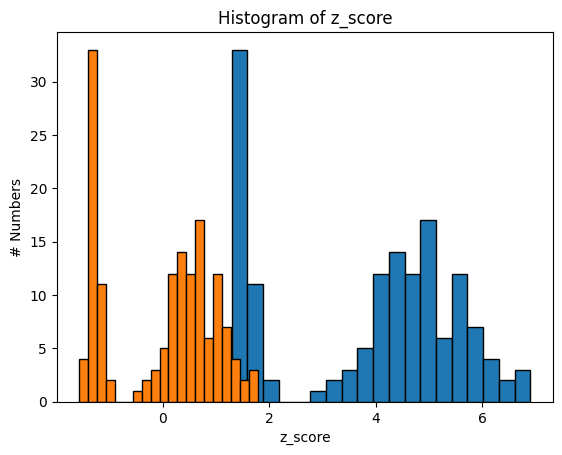

1.6
5.1
3.4999999999999996
Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), z_score]
Index: []




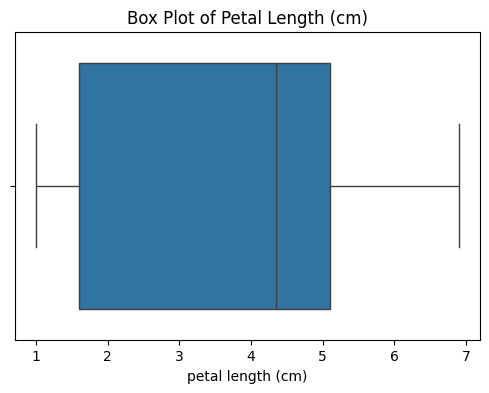

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
#from sklearn.datasets import load_iris

# Load dataset
iris = sklearn.datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
#print(df)
#print(df.head())
plt.hist(df['petal length (cm)'],bins=20,edgecolor='black')
plt.title('Histogram of petal length (cm)')
plt.xlabel('petal length cm')
plt.ylabel('# Numbers')


# Compute Z-score
df['z_score'] = (df['petal length (cm)'] - df['petal length (cm)'].mean()) / df['petal length (cm)'].std()
df_outliers_z = df[np.abs(df['z_score']) > 3]
#print(df['z_score'])
#print(df_outliers_z)
plt.hist(df['z_score'],bins=20,edgecolor='black')
plt.title('Histogram of z_score')
plt.xlabel('z_score')
plt.ylabel('# Numbers')
plt.show()
# Show the plot

# Compute IQR
Q1 = df['petal length (cm)'].quantile(0.25)
print(Q1)
Q3 = df['petal length (cm)'].quantile(0.75)
print(Q3)
IQR = Q3 - Q1
print(IQR)
df_outliers_iqr = df[(df['petal length (cm)'] < Q1 - 1.5 * IQR) | (df['petal length (cm)'] > Q3 + 1.5 * IQR)]
print(df_outliers_iqr)

print("\n")
# Plot boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['petal length (cm)'])

##??????##
# The code above uses boxplot function from seaborn lib to plot a boxplot of the petal length collumn of the dataframe!

plt.title("Box Plot of Petal Length (cm)")
plt.show()

### **Critical Thinking Exercise**
1. What are the advantages and disadvantages of using the **Z-score** versus the **IQR method** for detecting outliers?  
2. If your dataset has categorical variables, how **can** you detect outliers?  
3. How does removing outliers impact the performance of a machine learning model?  


## **2. Finding Missing Data**
### **Coding Exercise**
Load the `Titanic` dataset and identify missing values in the dataset.  
**Dataset**: `sns.load_dataset('titanic')`  
**Steps**:  
- Check for missing values using `df.isnull().sum()`.  
- Visualize missing values using a **heatmap**.  


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


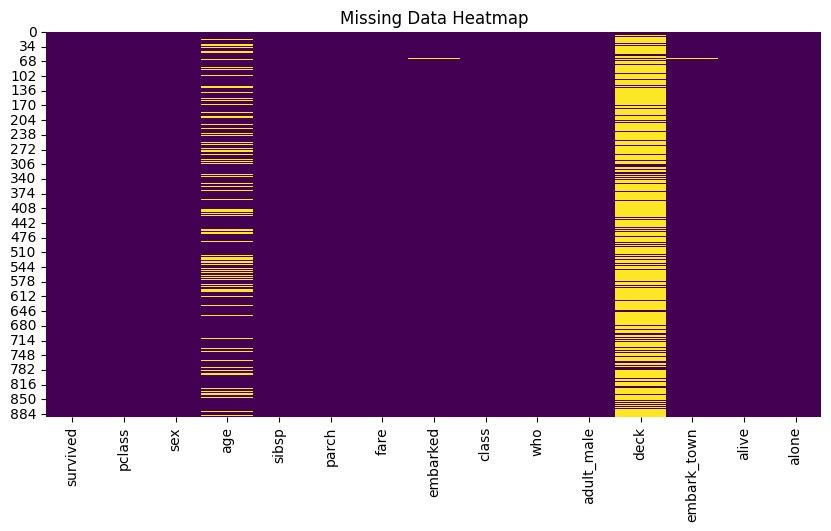

In [ ]:
import seaborn as sns

# Load dataset
df = sns.load_dataset('titanic')

# Find missing values
# print(df)
print(df.isnull().sum())

# Visualize missing data
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)

##??????##
# The code above plots a heatmap of all the data while marking the missing data uaing the seaborn lib!
#

plt.title("Missing Data Heatmap")
plt.show()



### **Critical Thinking Exercise**
1. Which columns in the Titanic dataset have the most missing values? Why do you think these values are missing?  
2. What are the possible reasons for missing data in real-world datasets?  
3. If a dataset has too much missing data in a particular column, should we remove that column? Why or why not?  


## **3. Removing Missing Data**
### **Coding Exercise**
Remove rows with missing values from the **Titanic dataset** and compare the dataset sizes before and after removal.

In [ ]:

# Remove missing values
df_cleaned = df.dropna()

print("Original dataset size:", df.shape)
print("Dataset size after removing missing values:", df_cleaned.shape)


Original dataset size: (891, 15)
Dataset size after removing missing values: (182, 15)


### **Critical Thinking Exercise**
1. What are the potential downsides of removing rows with missing values?  
2. If 30% of your dataset has missing values in a particular column, would you remove the entire column? Why or why not?  
3. How can you decide whether to **remove** or **impute** missing data?  



## **4. Imputing Missing Data**
### **Coding Exercise**
Impute missing values in the **Titanic dataset** using the **mean for numerical data** and **mode for categorical data**.



In [ ]:
from sklearn.impute import SimpleImputer

# Impute numerical columns with mean
num_imputer = SimpleImputer(strategy="mean")    ##??????##
df["age"] = num_imputer.fit_transform(df[["age"]])

# Impute categorical columns with mode
cat_imputer = SimpleImputer(strategy="most_frequent")
df["embark_town"] = cat_imputer.fit_transform(df[["embark_town"]]).ravel()

# Check if missing values are imputed
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64




### **Critical Thinking Exercise**
1. When is it better to use **mean imputation** versus **median imputation**?  
2. Why is imputing missing values better than removing them?  
3. How might imputation introduce bias into a dataset?  

---

## **5. Train-Test Split**
### **Coding Exercise**
Split the **Titanic dataset** into a **training set (80%)** and a **testing set (20%)**.



In [ ]:

from sklearn.model_selection import train_test_split

# Select relevant features
df = df[['age', 'fare', 'pclass', 'survived']].dropna()

# Define X (features) and y (target)
X = df[['age', 'fare', 'pclass']]
y = df['survived']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##??????##
# The code above splits the data in 2 test and train groups using its function from sklearn lib!


print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (712, 3)
Test set size: (179, 3)


### **Critical Thinking Exercise**
1. Why is it important to split data into training and testing sets?  
2. What happens if the test set is too small or too large?  
3. When would you use a validation set in addition to a test set?  

## **6. Visualizing Data**
### **Coding Exercise**
Create histograms and pair plots to explore feature distributions in the **Titanic dataset**.




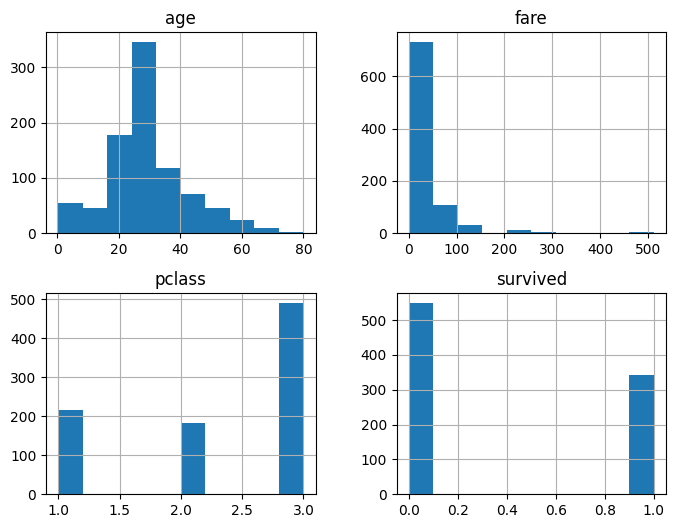

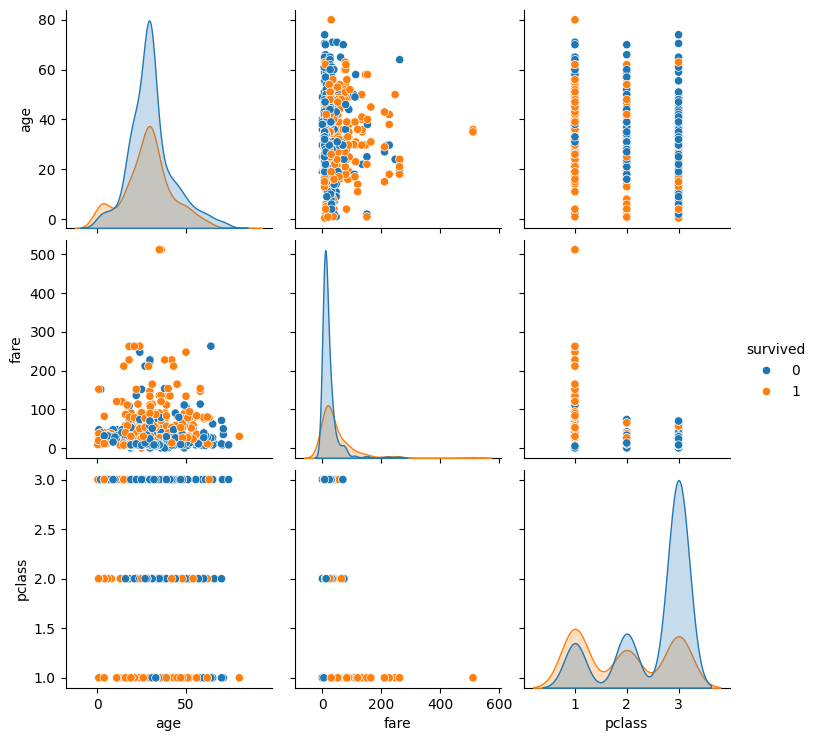

In [ ]:

# Histogram
df.hist(figsize=(8, 6))
plt.show()

# Pairplot
sns.pairplot(df[['age', 'fare', 'pclass', 'survived']], hue="survived")

##??????##
# The code above generates the pair plot for the specified columns and color the points based on the 'survived' column.

plt.show()


### **Critical Thinking Exercise**
1. What insights can you gain from the pair plot?  
2. How can visualizing data before training a model help with feature selection?  
3. If a dataset has a skewed distribution, what preprocessing techniques could be used?  


## **7. Checking Data Balancing**
### **Coding Exercise**
Check if the **Titanic dataset** is imbalanced by counting the number of survivors vs. non-survivors.


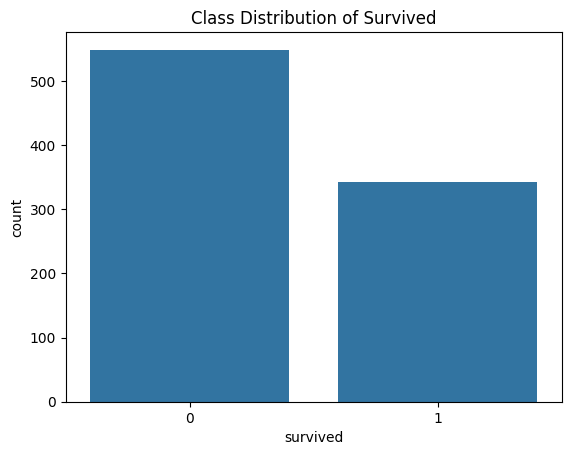

survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [ ]:

sns.countplot(x=df["survived"])

##??????##



plt.title("Class Distribution of Survived")
plt.show()

print(df["survived"].value_counts(normalize=True))



### **Critical Thinking Exercise**
1. Why is it important to check class balance in classification problems?  
2. What are some techniques for handling imbalanced datasets?  
3. How does class imbalance impact model performance?  